In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import math

In [15]:
#Function to draw cube
def draw_cube(ax, origin, size, color='skyblue', alpha=0.6):
    """Draws a cube at a given origin with a given size"""
    x, y, z = origin
    dx, dy, dz = size
    # Define the 8 vertices of the cube
    vertices = [
        [x, y, z],
        [x + dx, y, z],
        [x + dx, y + dy, z],
        [x, y + dy, z],
        [x, y, z + dz],
        [x + dx, y, z + dz],
        [x + dx, y + dy, z + dz],
        [x, y + dy, z + dz]
    ]
    # Define the 6 faces
    faces = [
        [vertices[0], vertices[1], vertices[2], vertices[3]],
        [vertices[4], vertices[5], vertices[6], vertices[7]],
        [vertices[0], vertices[1], vertices[5], vertices[4]],
        [vertices[2], vertices[3], vertices[7], vertices[6]],
        [vertices[1], vertices[2], vertices[6], vertices[5]],
        [vertices[4], vertices[7], vertices[3], vertices[0]]
    ]
    ax.add_collection3d(Poly3DCollection(faces, facecolors=color, edgecolors='k', linewidths=0.2, alpha=alpha))

In [16]:
#Line to line minimum distance function
def line_to_line_distance(p1, p2, q1, q2):
    """Returns shortest distance between two line segments p1-p2 and q1-q2"""
    u = p2 - p1
    v = q2 - q1
    w = p1 - q1
    a = np.dot(u, u)
    b = np.dot(u, v)
    c = np.dot(v, v)
    d = np.dot(u, w)
    e = np.dot(v, w)
    D = a * c - b * b
    sc, sN, sD = D, D, D
    tc, tN, tD = D, D, D

    SMALL_NUM = 1e-8

    if D < SMALL_NUM:
        sN = 0.0
        sD = 1.0
        tN = e
        tD = c
    else:
        sN = (b * e - c * d)
        tN = (a * e - b * d)
        if sN < 0.0:
            sN = 0.0
            tN = e
            tD = c
        elif sN > sD:
            sN = sD
            tN = e + b
            tD = c

    if tN < 0.0:
        tN = 0.0
        if -d < 0.0:
            sN = 0.0
        elif -d > a:
            sN = sD
        else:
            sN = -d
            sD = a
    elif tN > tD:
        tN = tD
        if (-d + b) < 0.0:
            sN = 0
        elif (-d + b) > a:
            sN = sD
        else:
            sN = (-d + b)
            sD = a

    sc = 0.0 if abs(sN) < SMALL_NUM else sN / sD
    tc = 0.0 if abs(tN) < SMALL_NUM else tN / tD

    dP = w + sc * u - tc * v
    return np.linalg.norm(dP)


In [17]:
#Pkg Input
pkg_x = 48
pkg_y = 45
pkg_z = 40

In [24]:
#Part input
part_l_x = 15
part_w_y = 10
part_h_z = 7

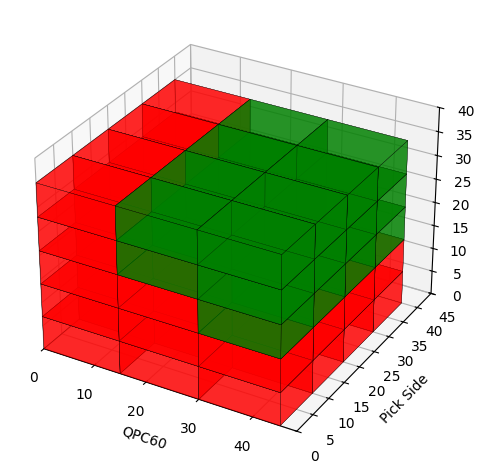

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

qpc = 0
max_x = math.floor(pkg_x - part_l_x) if pkg_x % part_l_x !=0 else pkg_x
max_y = math.floor(pkg_y - part_w_y) if pkg_y % part_w_y !=0 else pkg_y
max_z = math.floor(pkg_z - part_h_z) if pkg_z % part_h_z !=0 else pkg_z

# Define top-right edge of large cube
edge_p1 = np.array([pkg_x, 0, pkg_z])
edge_p2 = np.array([pkg_x, pkg_y, pkg_z])


for x in range(0, max_x, part_l_x):
    for y in range(0, max_y,part_w_y):
        for z in range(0, max_z, part_h_z): 
            local_edge_p1 = np.array([x + part_l_x, part_w_y, z + part_h_z])
            local_edge_p2 = np.array([x + part_l_x, y + part_w_y, z + part_h_z])
            
            dist = line_to_line_distance(local_edge_p1, local_edge_p2, edge_p1, edge_p2)
            
            color = 'green' if dist < 26 else 'red'
            draw_cube(ax, (x, y, z), (part_l_x, part_w_y, part_h_z), color = color)
            qpc = qpc + 1
            
# Set plot limits and labels
ax.set_xlim(0, pkg_x)
ax.set_ylim(0, pkg_y)
ax.set_zlim(0, pkg_z)
ax.set_xlabel('QPC' + str(qpc))
ax.set_ylabel('Pick Side')
ax.set_zlabel('Z')
plt.tight_layout()
plt.show()